In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# print(df_train)

# print(df_test)

# print(df_train.dtypes)

print(df_train.isna())



     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [2]:
df_train_filtered = df_train.query('Survived == False')

print(df_train_filtered)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
6              7         0       1                   McCarthy, Mr. Timothy J   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [3]:
# Répartition des passagers par âges
fig_reparti_age_passager = px.histogram(df_train, x='Age', nbins=30, title='Répartition des âges des passagers')
fig_reparti_age_passager.update_layout(xaxis_title='Âge', yaxis_title='Nombre de passagers')
fig_reparti_age_passager.show() 

In [4]:
# Répartition des âges selon le sexe
fig_reparti_age_sexe = px.histogram(
    df_train,
    x='Age',
    color='Sex', 
    facet_col='Survived',
    title='Répartition des âges selon le sexe et la survie',
    labels={'Survived': 'Survécu'},
    category_orders={'Survived': [1, 0]}
)

fig_reparti_age_sexe.update_layout(xaxis_title='Âge', yaxis_title='Nombre de passagers')
fig_reparti_age_sexe.show()

In [5]:
# Survie selon le sexe graphique circulaire
fig_survie_sexe = px.pie(
    df_train,
    names='Sex',
    values='Survived',
    title='Répartition de la survie selon le sexe',
    labels={'Survived': 'Survécu'},
    color='Sex',)
fig_survie_sexe.update_traces(textposition='inside', textinfo='percent+label')
fig_survie_sexe.update_layout(title_x=0.5)
fig_survie_sexe.show() 

In [ ]:
# df_train.info()
# df_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


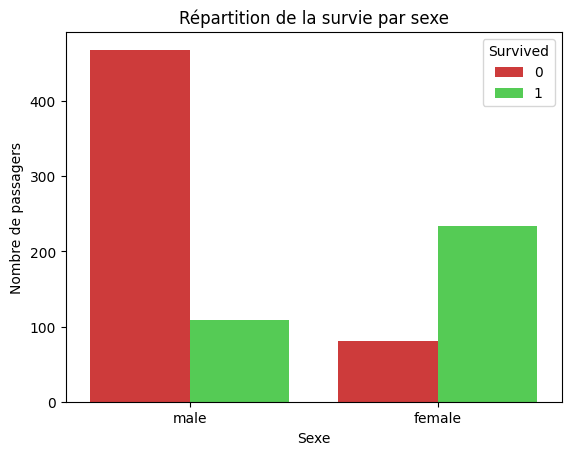

In [7]:
# Voir la survie des passagers par sexe
sns.countplot(data=df_train, x="Sex", hue="Survived", palette={0: "#e52323", 1: "#41df41"})
plt.title("Répartition de la survie par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.show()

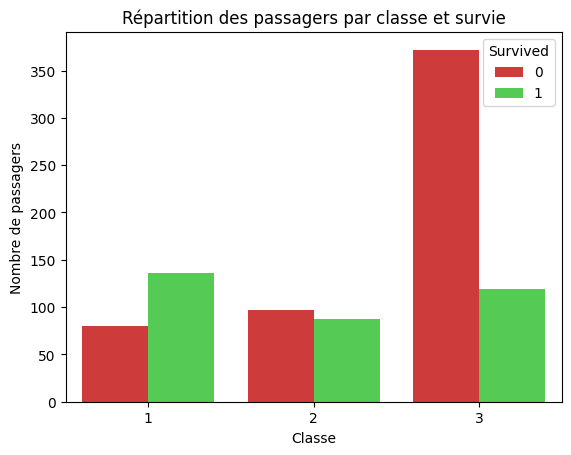

In [8]:
# Voir la répartition des passagers par classe
sns.countplot(data=df_train, x="Pclass", hue="Survived", palette={0: "#e52323", 1: "#41df41"})
plt.title("Répartition des passagers par classe et survie")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()

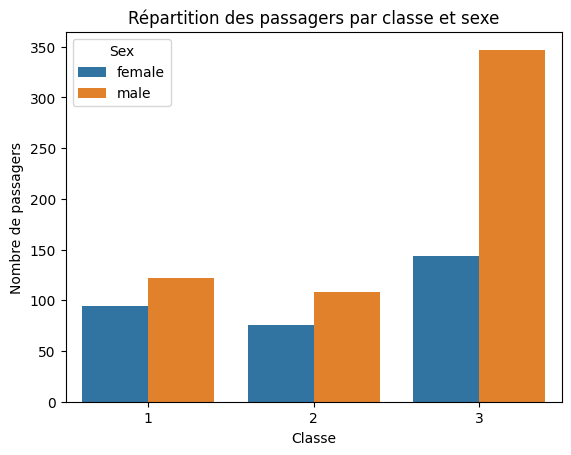

In [9]:
# Voir la répartition des passagers par classe et par sexe
sns.countplot(data=df_train, x="Pclass", hue="Sex")
plt.title("Répartition des passagers par classe et sexe")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()

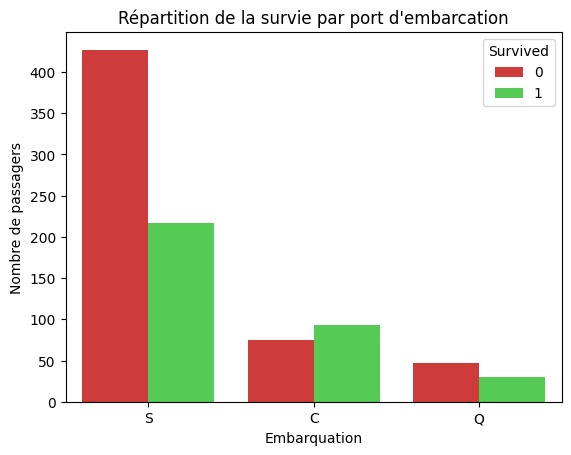

In [34]:
# Voir la répartition de la survie des passagers selon le port d'embarquement
sns.countplot(data=df_train, x="Embarked", hue="Survived", palette={0: "#e52323", 1: "#41df41"})
plt.title("Répartition de la survie par port d'embarcation")
plt.xlabel("Embarquation")
plt.ylabel("Nombre de passagers")
plt.show()

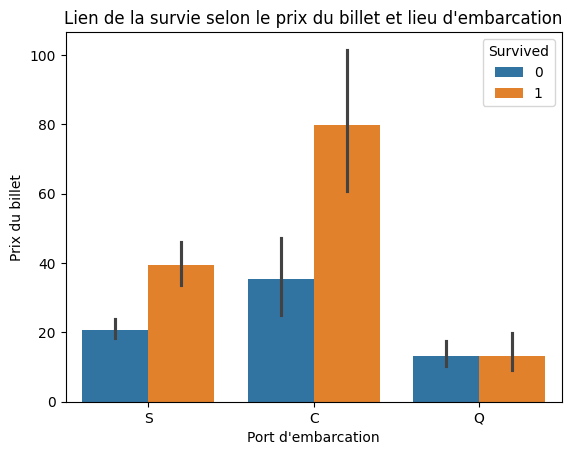

In [31]:
# Voir si le prix et le lieux d'embarcation a un impact sur la survie
sns.barplot(data=df_train, x='Embarked', y='Fare', hue='Survived')
plt.title("Lien de la survie selon le prix du billet et lieu d'embarcation")
plt.xlabel("Port d'embarcation")
plt.ylabel('Prix du billet')
plt.show()

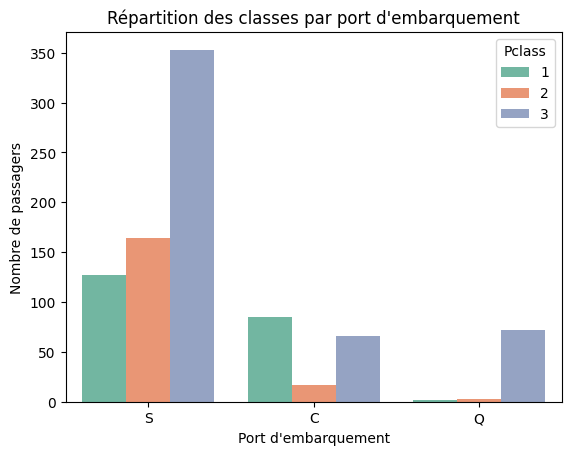

In [32]:
# Voir la relation entre la classe et le lieu d'embarcation.
sns.countplot(
    data=df_train,
    x="Embarked",
    hue="Pclass",     # Les classes seront différenciées par couleur
    dodge=True,
    palette="Set2"
)

plt.title("Répartition des classes par port d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Nombre de passagers")
plt.show()